In [3]:
import os

import numpy as np
import pandas as pd

import scipy.stats as stats
from scipy.stats import chi2_contingency

#import pandas_profiling

from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [4]:
data = pd.read_csv(r'cell2celltrain.csv')

In [5]:
data.shape

(51047, 58)

In [20]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [21]:
data.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [22]:
data[['Churn', 'CustomerID']].groupby('Churn').count()

,CustomerID
Churn,
No,36336
Yes,14711


In [23]:
data = data.dropna()
data.shape

(49752, 58)

In [24]:
data[['Churn', 'CustomerID']].groupby('Churn').count()

,CustomerID
Churn,
No,35507
Yes,14245


In [25]:
cat_cols = []
num_cols = []
for i,col in enumerate(data.columns):
    if(data[col].dtypes == 'object'):
        cat_cols.append(col)
    else:
        num_cols.append(col)
print(len(num_cols), num_cols)
print("\n")
print(len(cat_cols), cat_cols)

35 ['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']


23 ['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetention

In [30]:
data.ServiceArea.nunique()
cat_cols = ['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']
num_cols = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']

In [35]:
def printmd(string):
    display(Markdown(string))
    
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
def half_heat_map_corr_plot(corr_matrix, cat_cols):

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, xticklabels=cat_cols, yticklabels=cat_cols, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    #sns.heatmap(confusion_matrix, xticklabels=cat_cols, yticklabels=cat_cols)
        
        
def chisquare_testIndependence(colX, alpha, p):
    result = ""
    report_flag = True
    if p<alpha:
        result="{0} is <== IMPORTANT ==> predictor".format(colX)
        report_flag = True
    else:
        result="{0} is False <== NOT AN IMPORTANT ==> predictor. (Discard {0} from model)".format(colX)
        report_flag = False

    #print(result+"===> P values : "+str(p))
    return (report_flag,colX)

def testIndependence(dataframe, colX, colY, alpha=0.05):

    df = dataframe
    p = None #P-Value
    chi2 = None #Chi Test Statistic
    dof = None

    dfObserved = None
    dfExpected = None

    X = df[colX].astype(str)
    Y = df[colY].astype(str)

    dfObserved = pd.crosstab(Y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    p = p
    chi2 = chi2
    dof = dof 

    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)

    report_flag, colX = chisquare_testIndependence(colX, alpha, p)
    return (report_flag, colX, chi2, p)

def cotegorical_correlation(data, cat_cols, target_col):
    #chiTest = TestIndependenceChiSquare(data)

    confusions = []
    for i in range(0, len(cat_cols)):
        var1 = cat_cols[i]
        for j in range(0, len(cat_cols)):
            var2 = cat_cols[j]
            report_flag, colX, chi2, p = testIndependence(data, colX=var1, colY=var2) 
            confusions.append(p)
    corr_matrix = np.array(confusions).reshape(len(cat_cols), len(cat_cols))
    #print(corr_matrix)

    #chiTest = TestIndependenceChiSquare(data)

    imp_predictors = []
    non_imp_predictors = []
    for var in cat_cols:
        report_flag, colX, chi2, p = testIndependence(data, colX=var, colY=target_col) 
        if report_flag:
            imp_predictors.append(colX)
        else:
            non_imp_predictors.append(colX)
    
    printmd("**<font size='4'>List of Correlated Predictors wrt Target Varibale i.e : "+target_col+"</font>**")
    printmd(str(imp_predictors), color="blue")
    printmd("**<font size='4'>List of Non-Correlated Predictors wrt Target Varibale i.e : "+target_col+"</font>**")
    printmd(str(non_imp_predictors), color="red")
    printmd("<br><br>")
    
    printmd("**<font size='4'>Correlation Plot based on chi2 p-values:</font>**")
    #display(sns.heatmap(corr_matrix, xticklabels=cat_cols, yticklabels=cat_cols, center=0.05, vmin=0.0, vmax=0.06))#, annot=True, fmt="d")
    sns.heatmap(corr_matrix, xticklabels=cat_cols, yticklabels=cat_cols, center=0.05, vmin=0.0, vmax=0.06)
    printmd("<br><br>")
    
def catogorical_variables_failure_proportions(data, cat_cols, target_col):
    warning_cols = []
    for col in cat_cols:
        dist_df = pd.crosstab(data[col], data[target_col], normalize='index')
        printmd("**<================= Processing - "+col+ " =================>**")
        display(dist_df)


        if(dist_df.shape[0] == 1):
            warning_cols.append(col)
    
    printmd("<br>")
    printmd("**<font size='5'>Warnings:</font>**")
    for war_col in warning_cols:
        printmd("**"+ war_col +" : Having Constant Value**", color="red")
    printmd("<br>")

def categorical_predictors_dist(input_data, cat_cols, target_col):
    data = input_data.copy()
    data[target_col] = pd.Series(np.where(data[target_col] == 'Yes', 1 , 0), data.index)
    for i in range(len(cat_cols)): 
        col = cat_cols[i]
        width_size = data[col].nunique()
        f, axes = plt.subplots(ncols=1,figsize=(1.5*width_size, 6))
        a0 = sns.countplot(x=col, hue=target_col, data=data)
        a0.set_title(col)
        
def numerical_predictors_dist(input_data, num_cols, target_col):
    data = input_data.copy()
    data[target_col] = pd.Series(np.where(data[target_col] == 'Yes', 1 , 0), data.index)
    data_yes = data[data[target_col] == 1]
    data_no = data[data[target_col] == 0]
    for i in range(len(num_cols)): 
        col = num_cols[i]
        sns.distplot(data_yes[col], label='0', kde = False)
        sns.distplot(data_no[col], label='1',  kde = False)
        plt.legend(title=target_col, loc='best')
        plt.figure(figsize=(12,5))

def profiling_data_analysis(profiling_input_data, cat_cols, num_cols, target_col):
    profiling_data = profiling_input_data.copy() 
    
    printmd("**<font size='6'>Data Profiling</font>**", color=None)
    #display(pandas_profiling.ProfileReport(profiling_data))
    printmd("<br><br>")
    plt.pause(0.05)
    
    printmd("**<font size='5'>Test - Failure proportion of Categorical Variables</font>**", color=None)
    catogorical_variables_failure_proportions(profiling_data, cat_cols, target_col)
    printmd("<br><br>")
    plt.pause(0.05)
    
    printmd("**<font size='5'>Test - Failure Distribution graph of Categorical Variables</font>**", color=None)
    categorical_predictors_dist(profiling_data, cat_cols, target_col)
    printmd("<br><br>")
    plt.pause(0.05)
    
    printmd("**<font size='5'> Categorical Variables Correlation</font>**", color=None)
    cotegorical_correlation(profiling_data, cat_cols, target_col)
    printmd("<br><br>")
    plt.pause(0.05)
    
    printmd("**<font size='5'>Test - Failure Distribution graph of Numerical Variables</font>**", color=None)
    numerical_predictors_dist(profiling_data, num_cols, target_col)
    printmd("<br><br>")
    plt.pause(0.05)

#https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/

# Chi-Squared Percent Point Function
#from scipy.stats import chi2
# # define probability
#p = 0.95
#df = 10
# # retrieve value <= probability
#value = chi2.ppf(p, df)
#print(value)
# # confirm with cdf
#p = chi2.cdf(value, df)
#print(p)


<span style='color:None'>**<font size='6'>Data Profiling</font>**</span>

<span style='color:None'><br><br></span>

<span style='color:None'>**<font size='5'>Test - Failure proportion of Categorical Variables</font>**</span>

<span style='color:None'>**<================= Processing - Churn =================>**</span>

Churn,No,Yes
Churn,,
No,1.0,0.0
Yes,0.0,1.0


<span style='color:None'>**<================= Processing - ChildrenInHH =================>**</span>

Churn,No,Yes
ChildrenInHH,,
No,0.716138,0.283862
Yes,0.706170,0.293830


<span style='color:None'>**<================= Processing - HandsetRefurbished =================>**</span>

Churn,No,Yes
HandsetRefurbished,,
No,0.719126,0.280874
Yes,0.679855,0.320145


<span style='color:None'>**<================= Processing - HandsetWebCapable =================>**</span>

Churn,No,Yes
HandsetWebCapable,,
No,0.627811,0.372189
Yes,0.722948,0.277052


<span style='color:None'>**<================= Processing - TruckOwner =================>**</span>

Churn,No,Yes
TruckOwner,,
No,0.712612,0.287388
Yes,0.718222,0.281778


<span style='color:None'>**<================= Processing - RVOwner =================>**</span>

Churn,No,Yes
RVOwner,,
No,0.713234,0.286766
Yes,0.718606,0.281394


<span style='color:None'>**<================= Processing - Homeownership =================>**</span>

Churn,No,Yes
Homeownership,,
Known,0.717954,0.282046
Unknown,0.704686,0.295314


<span style='color:None'>**<================= Processing - BuysViaMailOrder =================>**</span>

Churn,No,Yes
BuysViaMailOrder,,
No,0.706128,0.293872
Yes,0.726638,0.273362


<span style='color:None'>**<================= Processing - RespondsToMailOffers =================>**</span>

Churn,No,Yes
RespondsToMailOffers,,
No,0.705449,0.294551
Yes,0.726906,0.273094


<span style='color:None'>**<================= Processing - OptOutMailings =================>**</span>

Churn,No,Yes
OptOutMailings,,
No,0.713729,0.286271
Yes,0.710456,0.289544


<span style='color:None'>**<================= Processing - NonUSTravel =================>**</span>

Churn,No,Yes
NonUSTravel,,
No,0.713366,0.286634
Yes,0.718838,0.281162


<span style='color:None'>**<================= Processing - OwnsComputer =================>**</span>

Churn,No,Yes
OwnsComputer,,
No,0.713412,0.286588
Yes,0.714834,0.285166


<span style='color:None'>**<================= Processing - HasCreditCard =================>**</span>

Churn,No,Yes
HasCreditCard,,
No,0.707498,0.292502
Yes,0.716480,0.283520


<span style='color:None'>**<================= Processing - NewCellphoneUser =================>**</span>

Churn,No,Yes
NewCellphoneUser,,
No,0.711990,0.288010
Yes,0.720737,0.279263


<span style='color:None'>**<================= Processing - NotNewCellphoneUser =================>**</span>

Churn,No,Yes
NotNewCellphoneUser,,
No,0.714929,0.285071
Yes,0.705891,0.294109


<span style='color:None'>**<================= Processing - OwnsMotorcycle =================>**</span>

Churn,No,Yes
OwnsMotorcycle,,
No,0.714088,0.285912
Yes,0.683976,0.316024


<span style='color:None'>**<================= Processing - HandsetPrice =================>**</span>

Churn,No,Yes
HandsetPrice,,
10,0.736223,0.263777
100,0.731183,0.268817
130,0.744983,0.255017
150,0.733598,0.266402
180,0.666667,0.333333
200,0.723716,0.276284
240,0.833333,0.166667
250,0.550000,0.450000
30,0.732335,0.267665


<span style='color:None'>**<================= Processing - MadeCallToRetentionTeam =================>**</span>

Churn,No,Yes
MadeCallToRetentionTeam,,
No,0.718705,0.281295
Yes,0.564466,0.435534


<span style='color:None'>**<================= Processing - CreditRating =================>**</span>

Churn,No,Yes
CreditRating,,
1-Highest,0.692758,0.307242
2-High,0.699872,0.300128
3-Good,0.692616,0.307384
4-Medium,0.742874,0.257126
5-Low,0.782911,0.217089
6-VeryLow,0.732571,0.267429
7-Lowest,0.713519,0.286481


<span style='color:None'>**<================= Processing - PrizmCode =================>**</span>

Churn,No,Yes
PrizmCode,,
Other,0.715911,0.284089
Rural,0.687317,0.312683
Suburban,0.720169,0.279831
Town,0.701094,0.298906


<span style='color:None'>**<================= Processing - Occupation =================>**</span>

Churn,No,Yes
Occupation,,
Clerical,0.708887,0.291113
Crafts,0.720637,0.279363
Homemaker,0.675159,0.324841
Other,0.711601,0.288399
Professional,0.718926,0.281074
Retired,0.747934,0.252066
Self,0.727064,0.272936
Student,0.697613,0.302387


<span style='color:None'>**<================= Processing - MaritalStatus =================>**</span>

Churn,No,Yes
MaritalStatus,,
No,0.731603,0.268397
Unknown,0.698911,0.301089
Yes,0.716362,0.283638


<span style='color:None'><br></span>

<span style='color:None'>**<font size='5'>Warnings:</font>**</span>

<span style='color:None'><br></span>

<span style='color:None'><br><br></span>

<span style='color:None'>**<font size='5'>Test - Failure Distribution graph of Categorical Variables</font>**</span>

C:\Users\Sandeep\Anaconda3\envs\dl_ver\lib\site-packages\ipykernel_launcher.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<span style='color:None'><br><br></span>

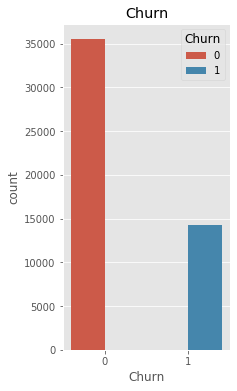

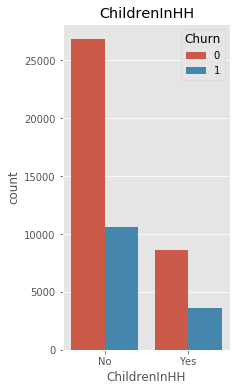

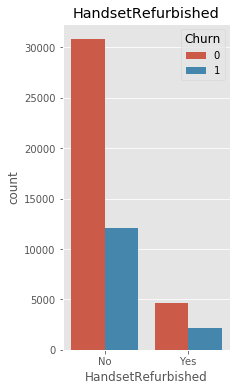

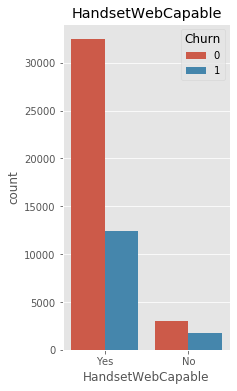

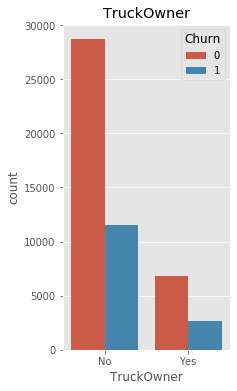

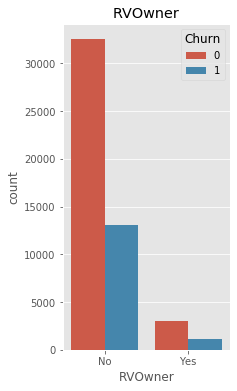

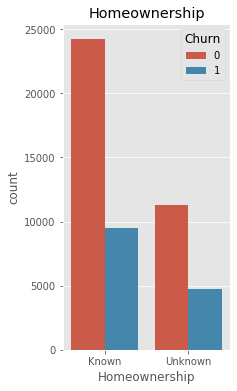

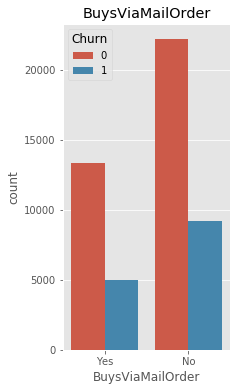

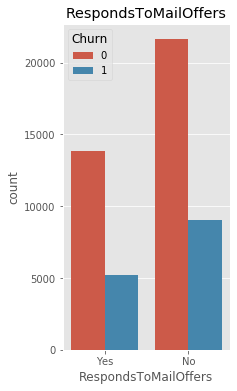

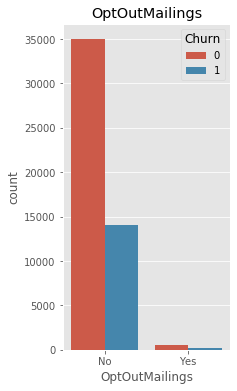

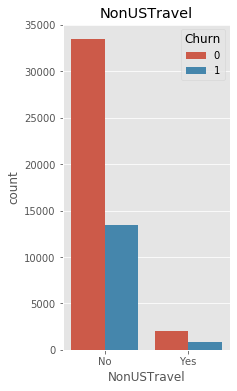

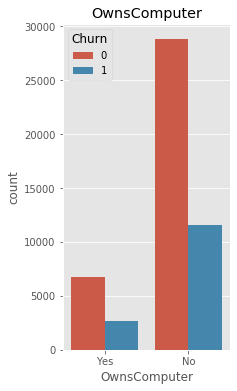

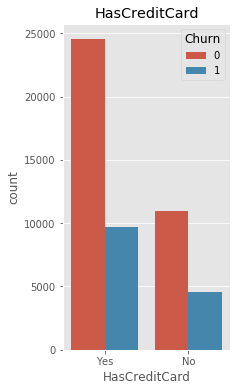

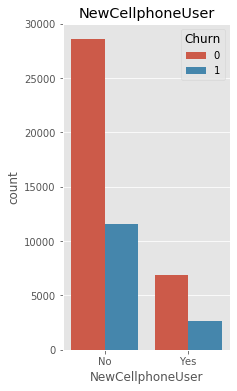

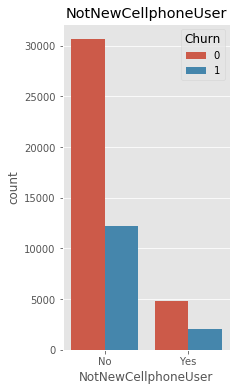

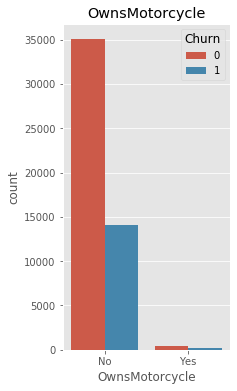

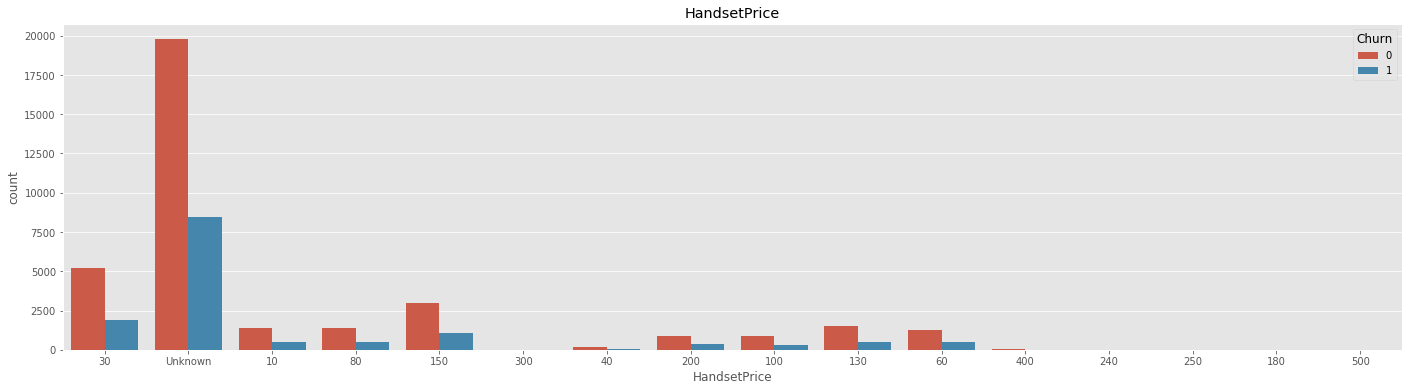

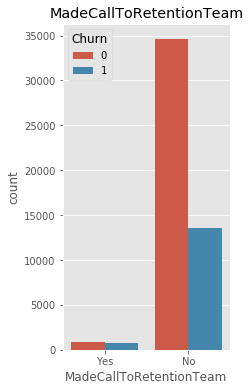

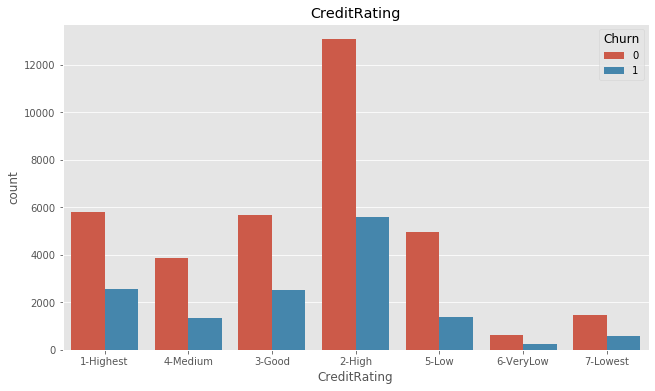

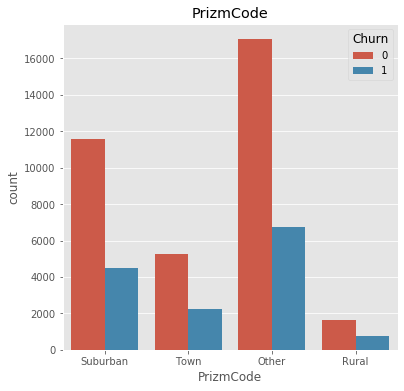

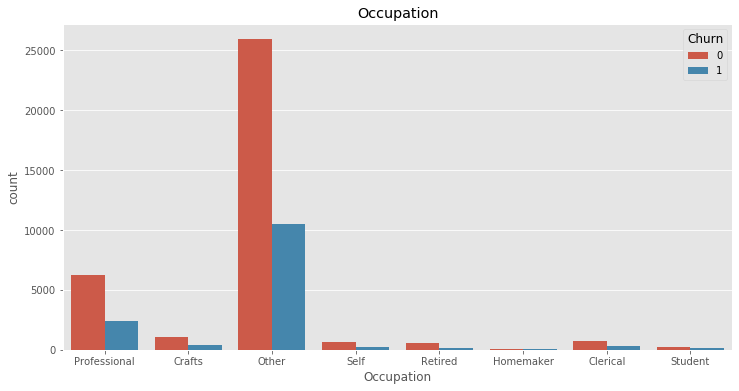

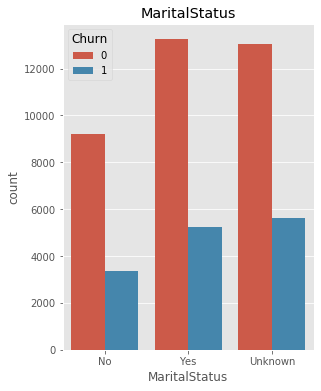

<span style='color:None'>**<font size='5'> Categorical Variables Correlation</font>**</span>

<span style='color:None'>**<font size='4'>List of Correlated Predictors wrt Target Varibale i.e : Churn</font>**</span>

<span style='color:blue'>['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'HasCreditCard', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'MaritalStatus']</span>

<span style='color:None'>**<font size='4'>List of Non-Correlated Predictors wrt Target Varibale i.e : Churn</font>**</span>

<span style='color:red'>['TruckOwner', 'RVOwner', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'Occupation']</span>

<span style='color:None'><br><br></span>

<span style='color:None'>**<font size='4'>Correlation Plot based on chi2 p-values:</font>**</span>

<span style='color:None'><br><br></span>

<span style='color:None'><br><br></span>

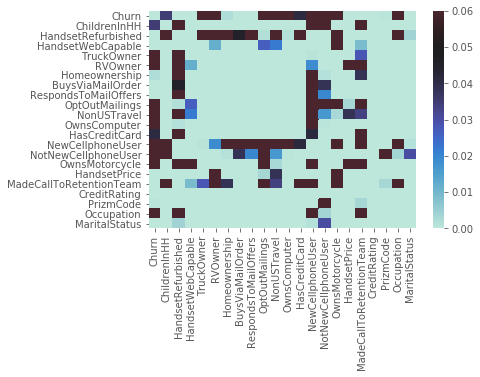

<span style='color:None'>**<font size='5'>Test - Failure Distribution graph of Numerical Variables</font>**</span>

C:\Users\Sandeep\Anaconda3\envs\dl_ver\lib\site-packages\ipykernel_launcher.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Sandeep\Anaconda3\envs\dl_ver\lib\site-packages\ipykernel_launcher.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Sandeep\Anaconda3\envs\dl_ver\lib\site-packages\ipykernel_launcher.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

<span style='color:None'><br><br></span>

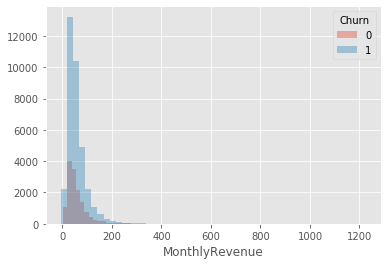

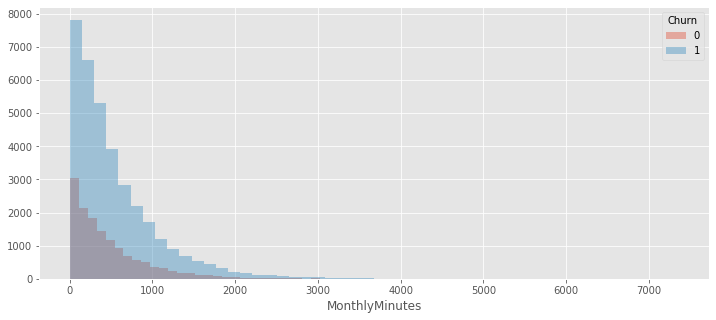

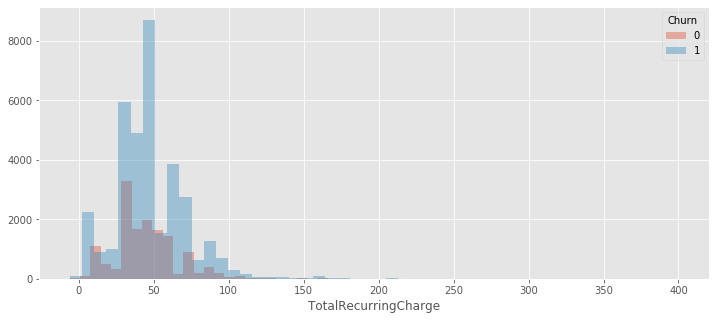

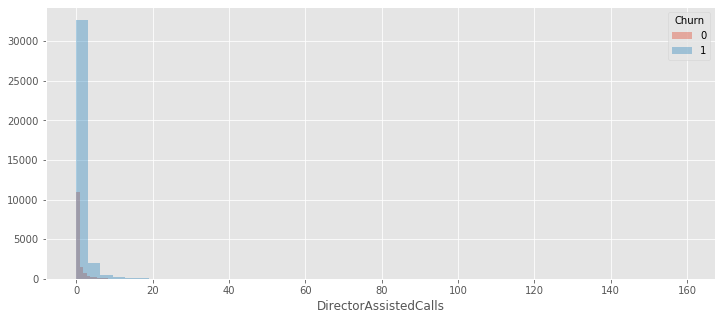

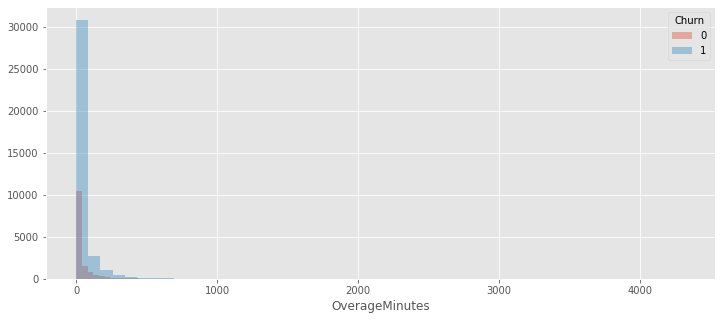

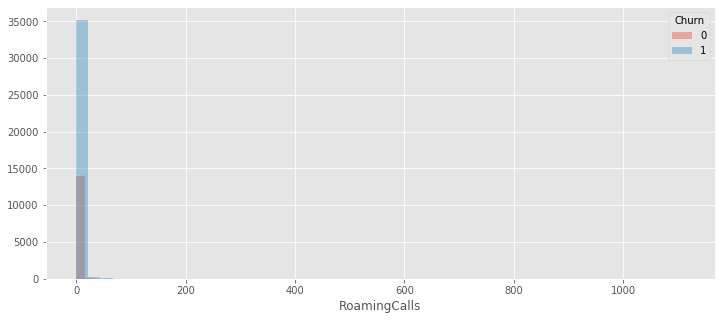

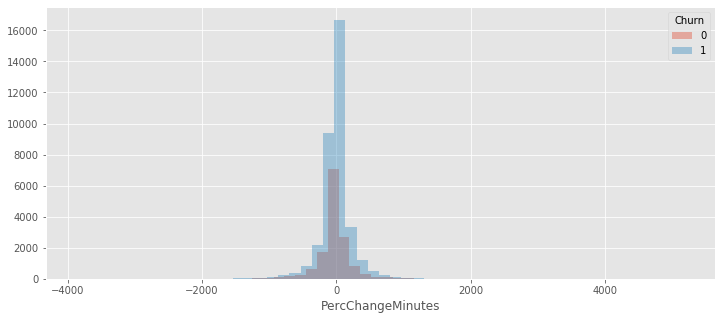

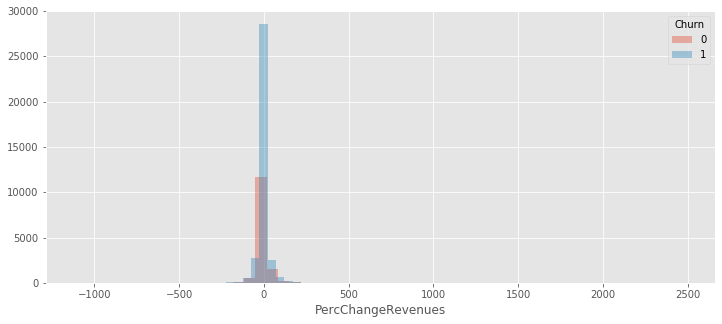

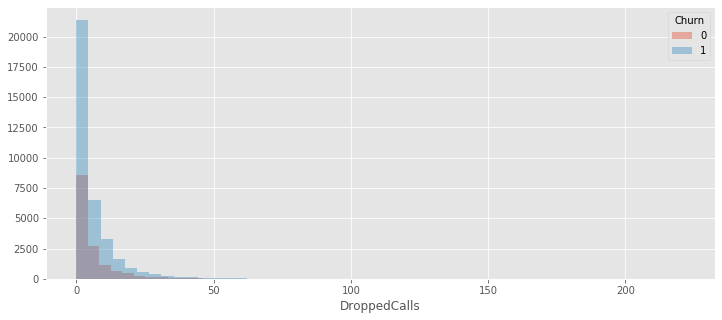

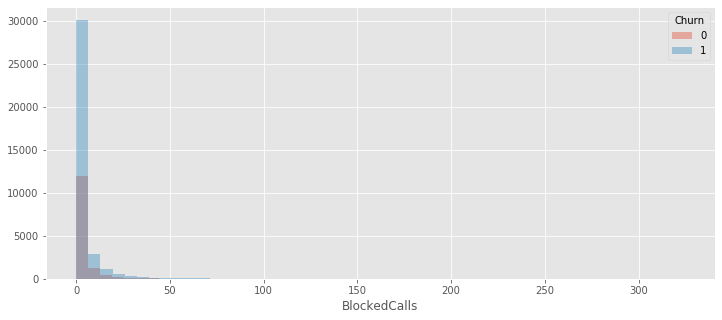

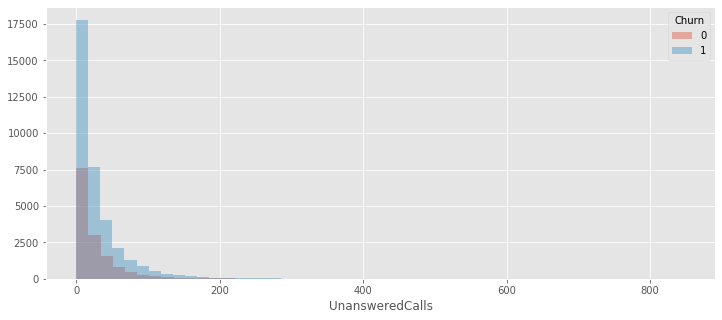

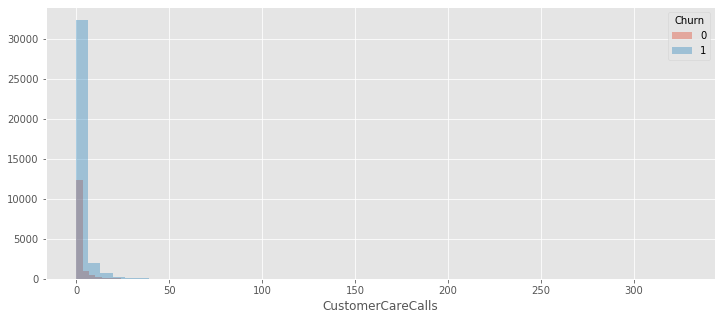

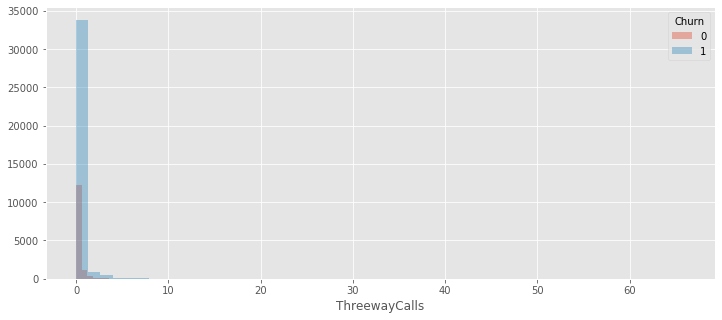

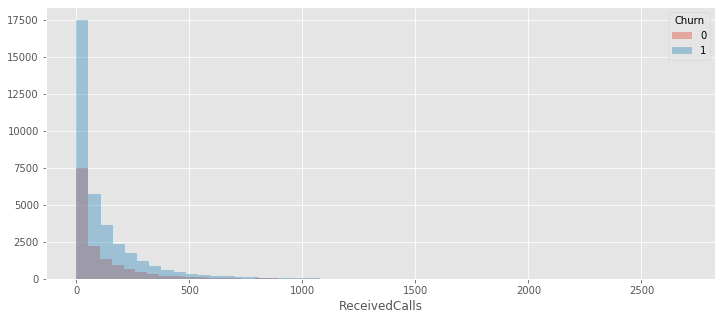

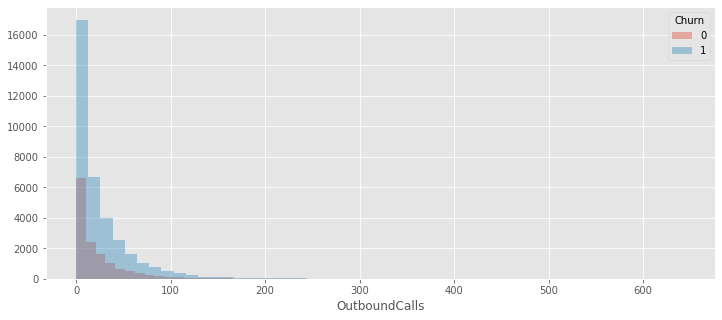

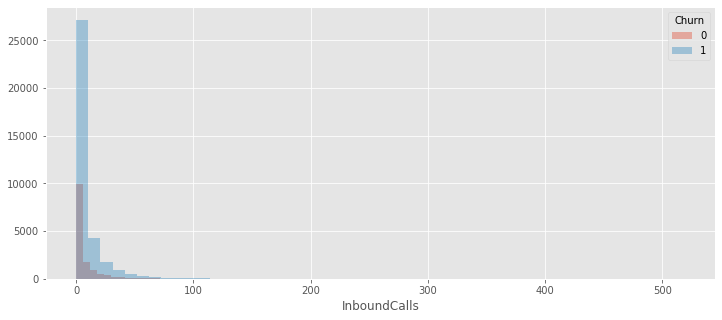

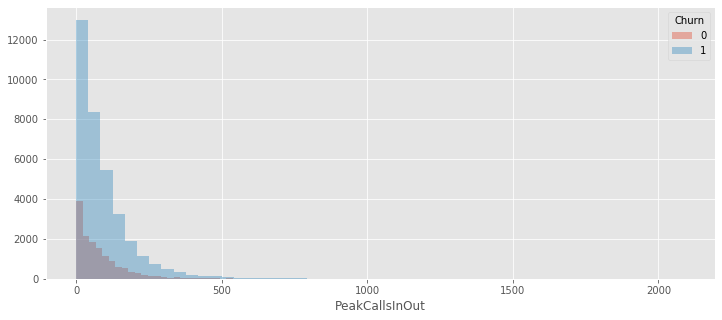

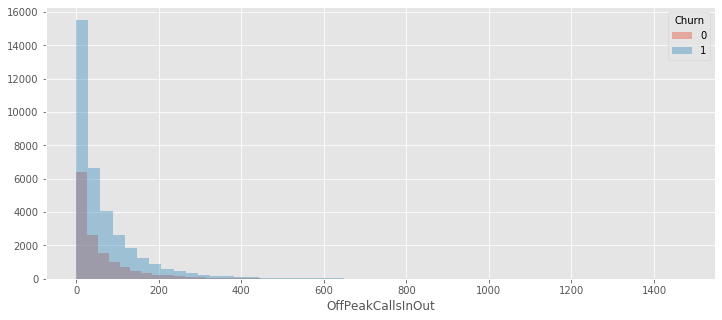

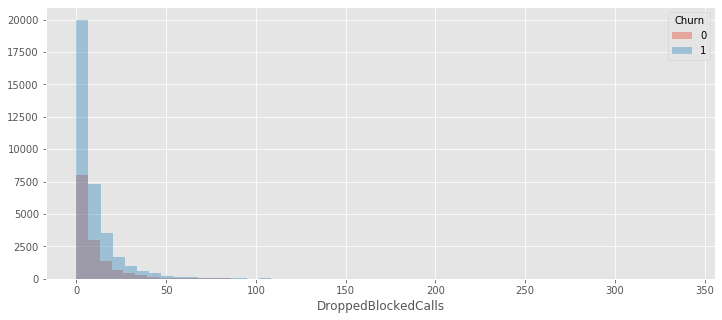

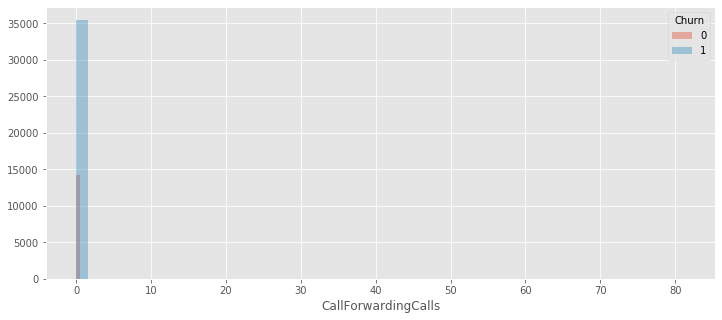

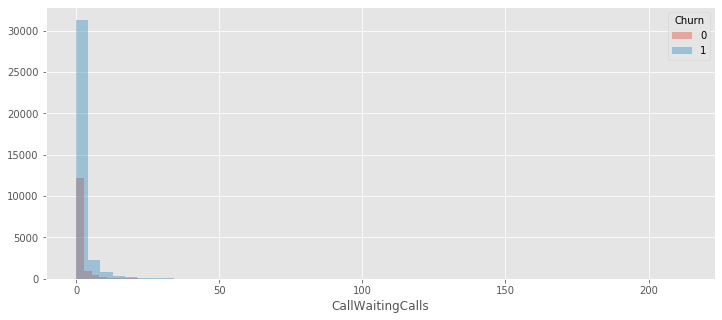

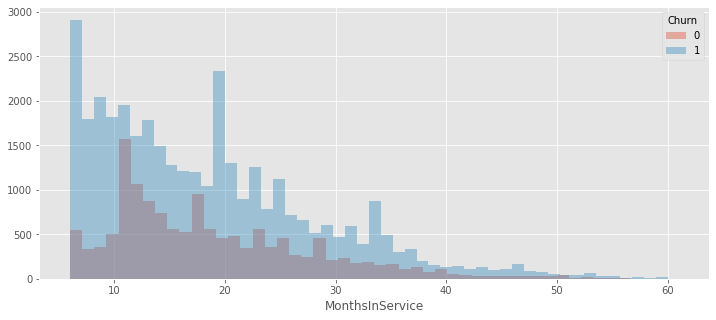

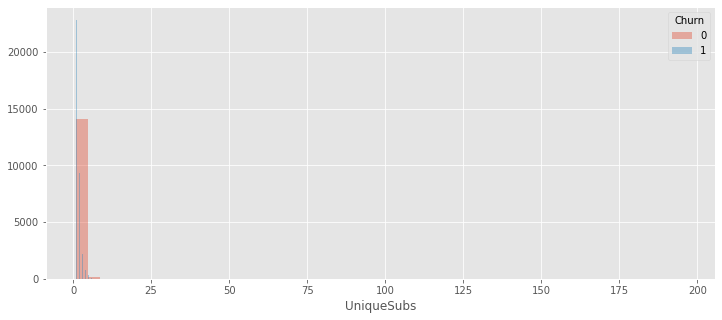

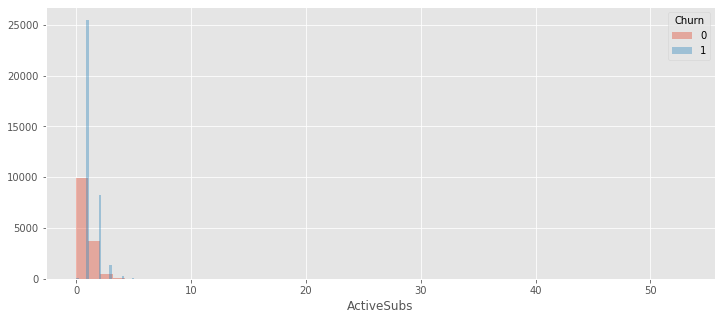

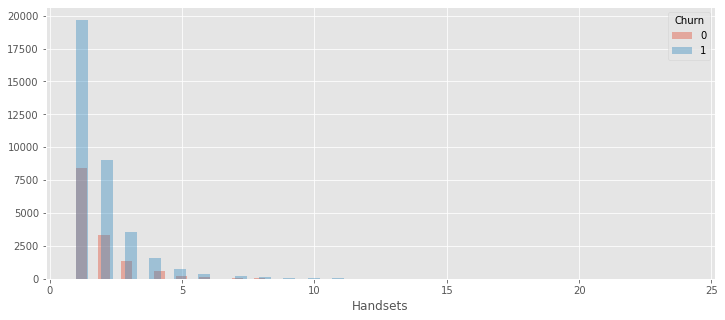

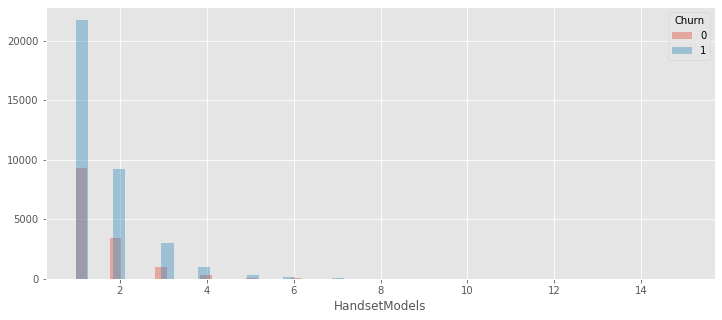

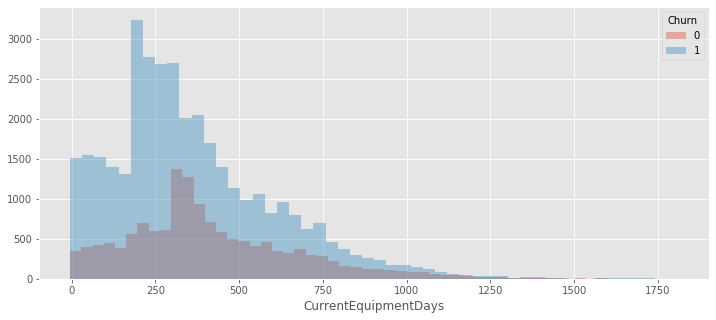

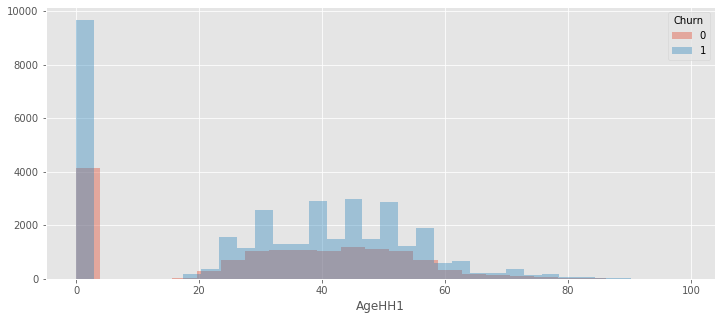

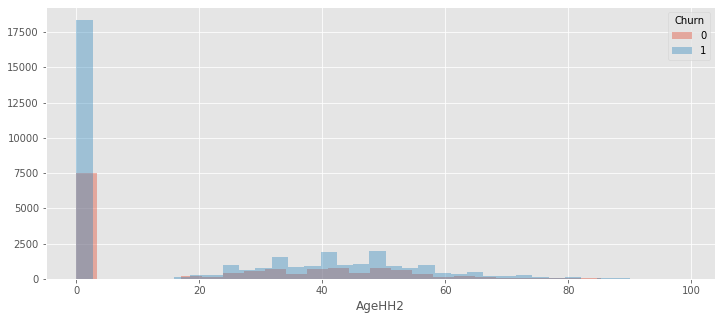

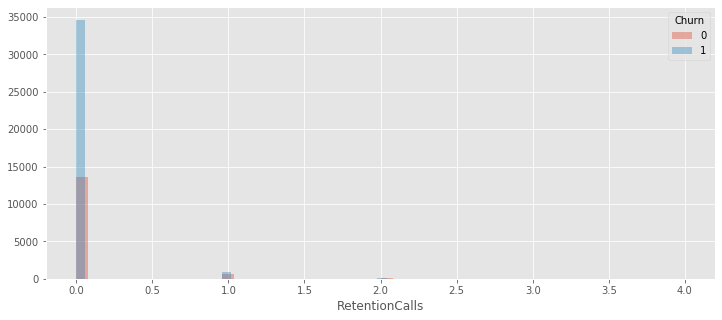

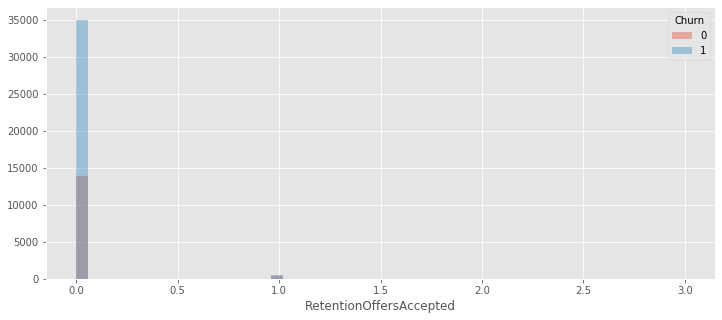

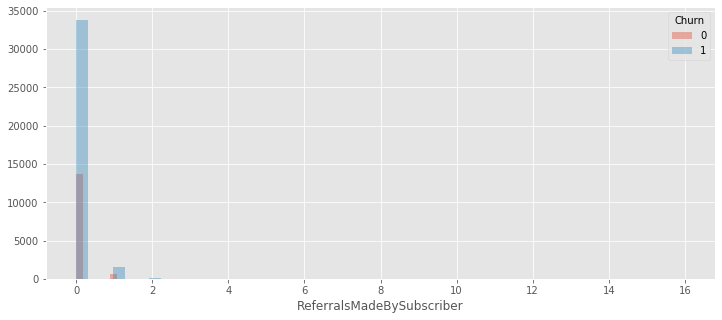

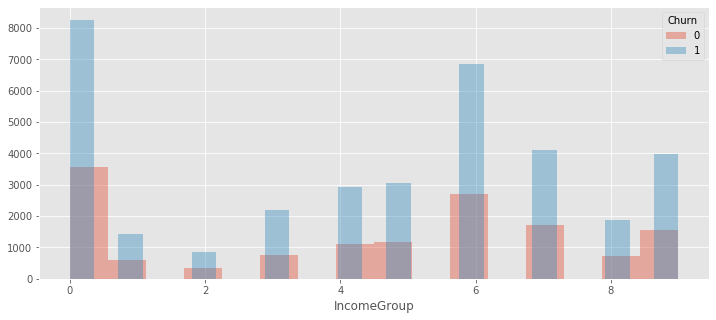

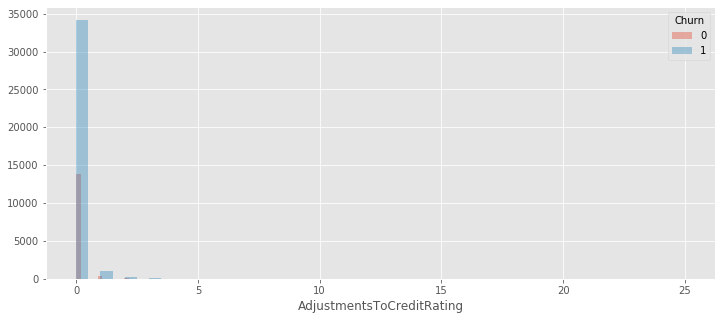

<Figure size 864x360 with 0 Axes>

In [36]:
cat_cols
num_cols
target_col = "Churn"
profiling_data_analysis(data, cat_cols, num_cols, target_col)

### Report Analysis

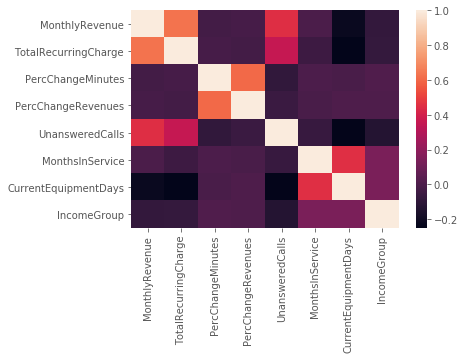

In [7]:
num_cols = ['MonthlyRevenue', 'TotalRecurringCharge', 'PercChangeMinutes', 'PercChangeRevenues',  'UnansweredCalls', 
            'MonthsInService', 'CurrentEquipmentDays', 'IncomeGroup',
            #'DirectorAssistedCalls', 'RoamingCalls', 'BlockedCalls', 'CustomerCareCalls','ThreewayCalls', 'CallForwardingCalls',
            #'CallWaitingCalls', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'AgeHH1', 'RetentionCalls',
            #'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating',          
            ]
cor_mat = data[num_cols].corr()
sns.heatmap(cor_mat)

### ServiceArea:
Having high cardinality, based on churn distribution we can cluster the Service area.

### MaritalStatus:
Having Unknown values.

### HandsetPrice:
Having Unknown values.

### Found some of the numerical features correlated.

### Following numerical varivales are right skewed, tailed data.
['MonthlyRevenue', 'DirectorAssistedCalls', 'RoamingCalls', 'UnansweredCalls', 'CustomerCareCalls','ThreewayCalls', 
           'BlockedCalls', 'CallWaitingCalls', 'CallForwardingCalls', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
           'RetentionCalls', 'MonthsInService', 'AdjustmentsToCreditRating' ]
